# Comparison of the z_min values for circular states

In [1]:
import matplotlib.pyplot as plt

from rydstate.rydberg_state import RydbergStateAlkali

In [2]:
n_list = list(range(15, 200))

qn_list = []
for n in n_list:
    l = {
        "circular": n - 1,
        "intermediate": (n - 1) // 2,
        "s": 0,
        "p": 1,
        "d": 2,
    }["circular"]
    j = l + 0.5
    qn_list.append((n, l, j))

In [3]:
z_i_dict = {"hydrogen": [], "classical": [], "rydstate cutoff": []}
for qn in qn_list:
    print(f"n={qn[0]}", end="\r")
    state = RydbergStateAlkali("Rb", n=qn[0], l=qn[1], j=qn[2])

    hydrogen_z_i = state.radial.model.calc_hydrogen_turning_point_z(state.n, state.l)
    z_i_dict["hydrogen"].append(hydrogen_z_i)
    z_i = state.radial.model.calc_turning_point_z(state.get_energy("a.u."))
    z_i_dict["classical"].append(z_i)

    state.radial.create_wavefunction()
    z_i_dict["rydstate cutoff"].append(state.radial.wavefunction.grid.z_min)

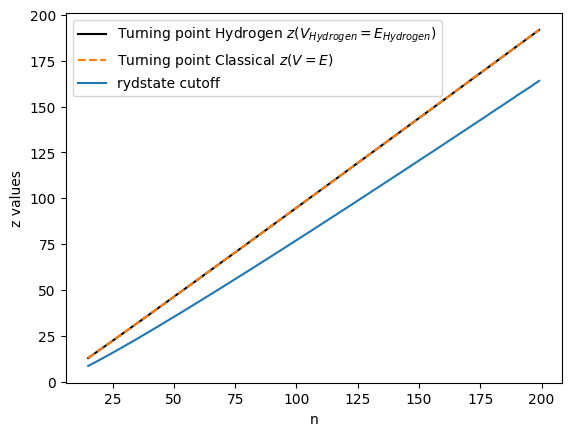

In [7]:
fig, ax = plt.subplots()

labels = {
    "classical": "Turning point Classical $z(V=E)$",
    "hydrogen": r"Turning point Hydrogen $z(V_{Hydrogen}=E_{Hydrogen})$",
}
linestyles = {
    "classical": "--",
    "hydrogen": "-",
}
colors = {
    "rydstate cutoff": "C0",
    "classical": "C1",
}

for key, values in z_i_dict.items():
    ax.plot(n_list, values, ls=linestyles.get(key, "-"), color=colors.get(key, "k"), label=labels.get(key, key))

ax.set_xlabel("n")
ax.set_ylabel("z values")

ax.legend()
plt.show()